___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [ ]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
#!pip install xgboost

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1') # Encoding ile UTF-8'e uygun hale getirdik.

<IPython.core.display.Javascript object>

In [4]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

<IPython.core.display.Javascript object>

In [5]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [6]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [7]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [8]:
data = pd.concat([df_male,df_female], axis=0, ignore_index=True)
data.head()

<IPython.core.display.Javascript object>

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [9]:
data.shape

(6068, 109)

In [10]:
data.info(verbose=True)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [11]:
data.isnull().sum().any()

True

In [12]:
data.duplicated().sum()

0

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64


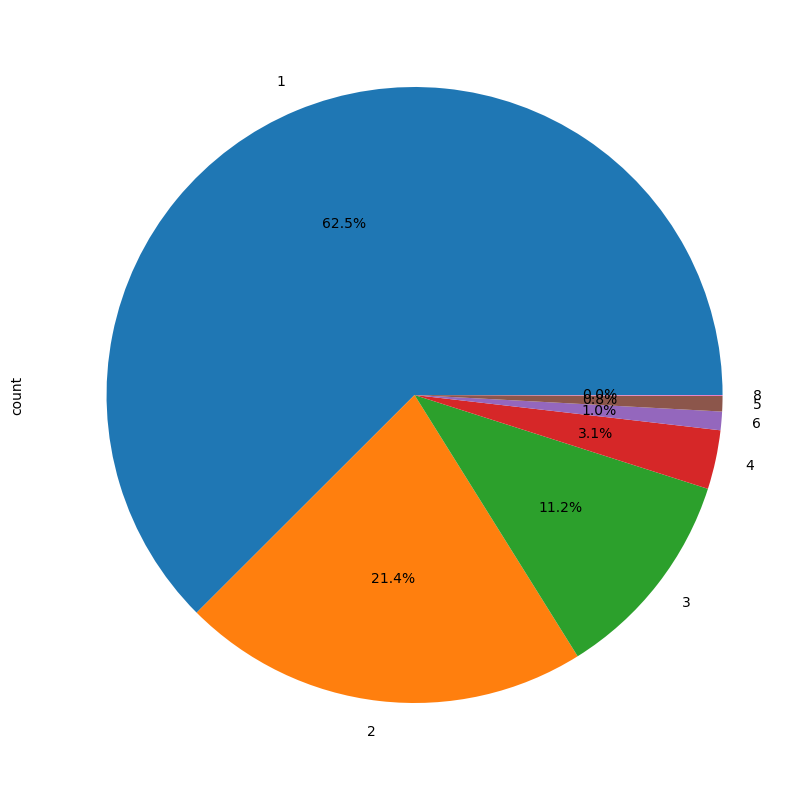

In [13]:
print(data["DODRace"].value_counts())
data["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [14]:
drop_list =[]
for col in data:
  if data[col].isnull().sum()>1800:
    print(f"{col} = {data[col].isnull().sum()}")
    drop_list.append(col)
  
  
drop_list 

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [15]:
data.drop(drop_list, axis=1, inplace=True)

In [16]:
data.isnull().sum().any()

False

In [17]:
data.shape

(6068, 106)

Object olan sutunlardaki unique degerlere baktim. Cunku bunlari daha sonra get_dummies yapilacak

In [18]:
# to find how many unique values object features have
for col in data.select_dtypes("object"):
  print(f"{col} has {data[col].nunique()} unique value")
    

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [19]:
data.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

Target label' daki rakamlarin ne anlama geldigini daha iyi anlayabilmek icin isimlerini degisti

In [20]:
data["DODRace"] = data.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

"Component" ve "Branch" sutunlarini silmdim Hispanic' lerin sayisi daha fazla ise katkisi olabilirdi (Datada hispanic sayisi az oldugu icin onu onemsiyoruz). Fakat dagilimin esitti. Bu yuzden silecegiz :

In [21]:
data.groupby(["Component"])["DODRace"].value_counts() #.iplot(kind="barh")

Component            DODRace         
Army National Guard  White               1855
                     Black                499
                     Hispanic             253
                     Asian                 60
                     Native American       24
                     Pacific Islander      17
Army Reserve         White                114
                     Black                 52
                     Hispanic              41
                     Asian                  9
                     Pacific Islander       3
                     Native American        1
Regular Army         White               1823
                     Black                747
                     Hispanic             385
                     Asian                119
                     Pacific Islander      39
                     Native American       24
                     Other                  3
Name: count, dtype: int64

In [22]:
data.groupby(["Component", "Branch"])["DODRace"].value_counts() #.iplot(kind="barh")

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               623
                                             Black                79
                                             Hispanic             74
                                             Asian                18
                                             Native American       9
                                             Pacific Islander      4
                     Combat Service Support  White               917
                                             Black               312
                                             Hispanic            142
                                             Asian                33
                                             Pacific Islander     11
                                             Native American      10
                     Combat Support          White               315
                                         

In [23]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin",   
]

data.drop(drop_list1, axis=1, inplace=True)

In [24]:
data.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [25]:
data.SubjectNumericRace.value_counts()

SubjectNumericRace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: count, dtype: int64

In [26]:
data.drop("SubjectNumericRace",axis=1,inplace=True)

target' ta sadece White, Black ve Hispanic kalacak :

In [27]:
data.DODRace.value_counts()

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

In [28]:
data.DODRace.value_counts()

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: count, dtype: int64

In [29]:
data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") |
                (data["DODRace"] == "Hispanic")]
data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [30]:
data.reset_index(drop=True, inplace=True)  # Sildigimiz degerlerden dolayi datayi bastan indexlememiz gerekir.

In [31]:
data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [124]:
#plt.figure(figsize=(20,20))
#sns.heatmap(data.corr(), cmap ="coolwarm")

Birbirleriyle cok fazla multicollinearity iliskisi olan feature' lari tespit etmek icin bir fonksiyon kullandim

In [125]:
#df_temp = data.corr()
#feature =[]
#collinear=[]
#for col in df_temp.columns:
#    for i in df_temp.index:
#        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
#                feature.append(col)
#                collinear.append(i)
#                # print(f"multicolinearity alert in between {col} - {i}")

In [126]:
#my_dict = {"feature":feature, "collinear":collinear}
#df_col = pd.DataFrame(my_dict)
#df_col

"Hangi fueature digerleri ile en fazla multicollinearity?" bunu asagida goruyoruz. "kneeheightsitting" gibi diger feature' larla en cok multicollinearity' si olan feature' lar tutulup, multicollinearity sorunu yasadigi feature' lar silinerek de yola devam edilebilirdi. Bu sekilde yola daha az feature ile devam edilip complexity de azaltilabilirdi. 

In [127]:
# df_col.value_counts("feature")   

<IPython.core.display.Javascript object>

## Explore Data

<IPython.core.display.Javascript object>

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

Logistic Regression Gradient Descent tabanli SVM ise distance tabanli bir model. Bu modeller icin mutlaka get_dummies yapilmali (Tree based modellerde dummy islemi uygulamayacagim. Bu yuzden o modellerde yeni X ve y tanimladim.

In [38]:
X = data.drop("DODRace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = data.DODRace

<IPython.core.display.Javascript object>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [40]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

In [41]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

class_weight='balanced' default deger degil fakat target' ta unbalance bir durum olabilir.

Scale islemleri yapilirken mutlaka Pipeline kullanilmali (Cross Validate ve GridSearch' de olusacak olan data leakage' i engellemek icin) :

In [42]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

Yukarida scale islemini yaptim ve modeli kurdum. Asagida da egittim.

In [43]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  5 110  21]
 [ 25  90 643]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.81      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   38   29]
 [  21  456   66]
 [  57  356 2621]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



Black classinin skorlarinin cok yuksek oldugunu goruluyor. Demek ki Black class' i digerlerine gore daha cok ayirt edici ozelliklere sahip. Hispanic class' inda degerler arasinda ciddi bir dengesizlik var. Bundan sonraki asamalarimizda Hispanic class' ina ait Precision, Recall ve F1 skorlarini iyilestirme uzerine calisacagim. Ozel olarak bu class ile ilgilendigimiz icin make_scorer' i kullanabilirim. :

In [44]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

Cross Validation isleminde once modelimizi sifirladim. Cross Validate isleminden sonra Hispanic class' ina ait skorlarin, yukaridaki tek seferlik skorlar ile dengeli oldugunu gördüm.

In [45]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic          NaN
test_precision_Hispanic   NaN
test_recall_Hispanic      NaN
dtype: float64

### Logistic Model GridsearchCV

In [46]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

'liblinear' kucuk datalarda guzel sonuclar verdigi icin GridSearch' e onu da ekledim :

In [47]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [48]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,      # Hispanic turunun skorlarini artiracak en iyi parametreleri bul.
                              n_jobs=-1, cv=5)

In [49]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, response_method='predict', average=None, labels=['Hispanic']),
             verbose=3)

In [50]:
log_model_grid.best_params_

{'log__C': 0.1, 'log__penalty': 'l1', 'log__solver': 'liblinear'}

In [51]:
log_model_grid.best_score_

nan

GridSearch isleminden cikan best parametrelerin default degerler oldugunu goruyorum. Demek ki default degerlerimiz en iyi sonucu veren degerlermis. GridSearch isleminden sonra terar CrossValidate yapmaya gerek yok.

In [52]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[229   2  29]
 [  9  76  51]
 [ 29  38 691]]
              precision    recall  f1-score   support

       Black       0.86      0.88      0.87       260
    Hispanic       0.66      0.56      0.60       136
       White       0.90      0.91      0.90       758

    accuracy                           0.86      1154
   macro avg       0.80      0.78      0.79      1154
weighted avg       0.86      0.86      0.86      1154


Train_Set
[[ 914   24  100]
 [  47  297  199]
 [  86  125 2823]]
              precision    recall  f1-score   support

       Black       0.87      0.88      0.88      1038
    Hispanic       0.67      0.55      0.60       543
       White       0.90      0.93      0.92      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.79      0.80      4615
weighted avg       0.87      0.87      0.87      4615



Dengesiz bir dataseti oldugu icin PrecisionRecallCurve' e baktik. Hispanic class' inin skorlari kotu oldugu icin onun skorlarina odaklaniyorum. Modelin genel performansina gore Hispanic' leri tespit etmedeki genel basari %73 :

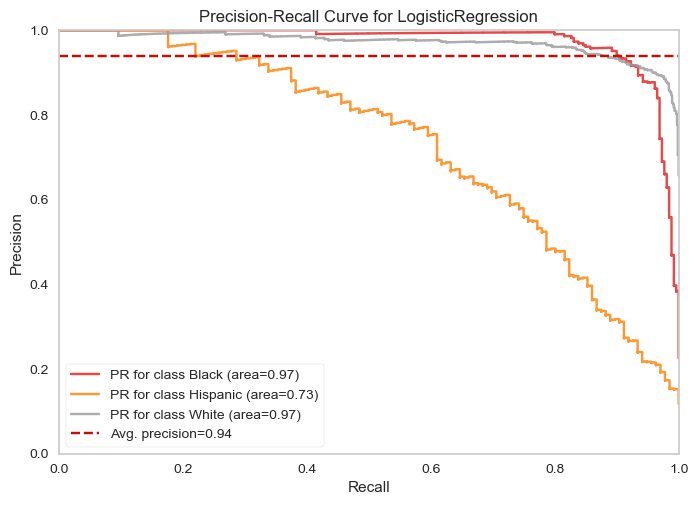

In [53]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   # Tabloda isimler gorunsun diye bunu yazdik.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

viz.score_' a bakarak yukaridaki grafikteki skorlari yazdirabilirim :

In [54]:
viz.score_  #["Hispanic"]   # Bu skorlari asagida kiyaslayabilmek icin asagida bir degiskene atadik. 

{'Black': 0.9742444777623361,
 'Hispanic': 0.7324072185892606,
 'White': 0.9713517371290685,
 'micro': 0.9380180028261995}

Multiclass datalarda f1, recall, precision skorlari icin average mutlaka belirtilmeli. Biz sinifin direk kendisini istedigimiz icin, ortalama deger istemedigimiz icin none olarak belirttim. (Multiclass' larda average belirtilmek zorunda.)

labels=["Hispanic"] -----> Hangi class' in skoru alinacak ise mutlaka koseli parantez icinde yazilmali. Tercihe gore koseli parantez icine virgul konup diger class isimleri de yazilabilir. Eger birden fazla class ismi belirtilirse average=macro veya average=weight yazilir ve belirtilen class' larin ortalama degerleri dondurulur. tek bir class' a ait skorlara bakacagim.

In [55]:
log_AP = viz.score_["Hispanic"]    # log modelden aldigimiz Hispanic classs' ina ait Avg. precision skoru

sadece Hispanic' lere ait test skorlarini aldegiskenlere atadim :

In [56]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"] 
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])            # Hispanic f1 skoru
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])    # Hispanic recall skoru

## 2. SVC

### Vanilla SVC model

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin class_weight="balanced" belirttim.

Scale islemi icin pipeline' i sifirdan kurmak zorundamiz. Cunku icinde kullanacagimiz model ismi degisti.

In [57]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

SVC skorlarinin asagi yukari Logistic Regression ile yakin skorlar elde ettim. Precision degeri yukarida %52 idi, burada %48' e dusmus; f1 skoru yukarida %64 idi burda %61' e dusmus

In [58]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [  5 111  20]
 [ 22 107 629]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.48      0.82      0.61       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 959   41   38]
 [  22  452   69]
 [  53  422 2559]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



Cross Validate isleminden aldigimiz skorlarin tek seferlik skorlar ile yakin oldugunu soyleyebilirim :

In [59]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic          NaN
test_precision_Hispanic   NaN
test_recall_Hispanic      NaN
dtype: float64

###  SVC Model GridsearchCV

In [60]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]    # Makine gucunden dolayi cok genis tutmadik
}

In [61]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]

# GridSearch veya Cross Validate oncesi modeli sifirlamak onemli.

In [62]:
model = Pipeline(steps=operations_svc)

Asagida yine sadece recall_hispanic skorlarini tanimladim. Cunku onu yukseltecek best parametreleri ariyorum :

In [63]:
svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [64]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, response_method='predict', average=None, labels=['Hispanic']),
             verbose=3)

In [65]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

Grid Search best_score' u 0.76 olarak buldu. 
Yukarida Cross Validate ile elde ettigim skora yakin bir skor cikti :

In [66]:
svm_model_grid.best_score_

nan

Grid Search islemi sonrasi Hispanic class' ina ait precision degerinin biraz daha arttigini arttigini, diger skorlarin pek degismedigini goruyorum. Logistic model skorlarina yaklastim :

In [67]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [  5 111  20]
 [ 22 107 629]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       260
    Hispanic       0.48      0.82      0.61       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 959   41   38]
 [  22  452   69]
 [  53  422 2559]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [68]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

# PrecisionRecall oncesi modelimizi sifirladik.

Logistic modelde PrecisionRecall' da Hispanic class' inin genel performansi %73 idi burda %71' e dustu. 

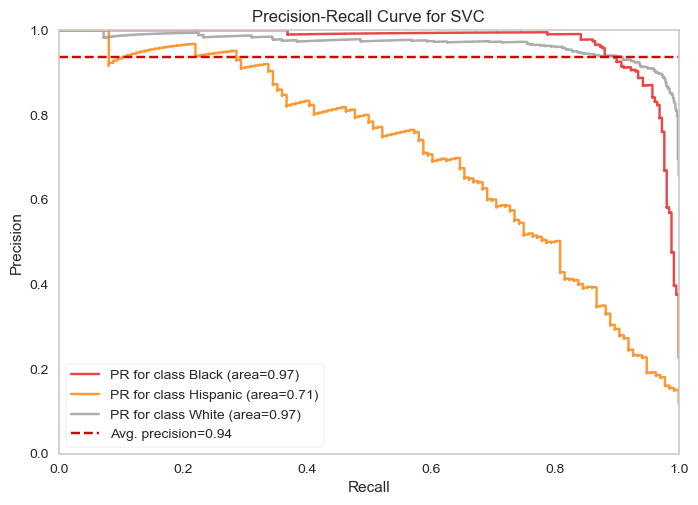

In [69]:
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

Tum model sonuclarini asagida karsilastirmak icin cikan skorlarimizi tekrar degiskenlere atadim :

In [70]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [71]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
X2 = data.drop("DODRace",axis=1)          # Encoder icin yeni bir X degiskeni atadik.
y = data.DODRace                          # y' ye Encoder islemi uygulanmaz.

In [73]:
cat = X2.select_dtypes("object").columns
cat                                        # OrdinalEncoder icin object feature' lari bir degiskene atadik.

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [74]:
enc = OrdinalEncoder()    # Ordinal Encoder' i tanimladik.

In [75]:
X2[cat] = enc.fit_transform(X2[cat])    # Kategorik feature' larin icindeki butun unique degerleri sayisal degerlere cevirdi.
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,21,2.0


In [76]:
X2[cat] = enc.fit_transform(X2[cat])    # Kategorik feature' larin icindeki butun unique degerleri sayisal degerlere cevirdi.
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,21,2.0


Kategoric olan feature' lar Encoder ile sayisal verilere donustukten sonra yukaridaki modeller ile karismasin diye yeni degiskenler ile train ve test datalari olusturdum :

In [77]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

<IPython.core.display.Javascript object>

In [78]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

class_weight="balanced" bastan belirledik conku datamiz unbalance durumda.

In [79]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [80]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

Balance yapmis olmamiza ragmen Hispanic class' inin test setine ait recall ve f1 skorlari cok kotu cikti. Train setindeki skorlar %100, Test seti skorlari cok kotu. Overfitting durumu var. Sonraki adimlarda hyperparametreler ile oynayarak skorlari iyilestirmeye calisacagim :

In [81]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[192   1  67]
 [  9   5 122]
 [ 11   0 747]]
              precision    recall  f1-score   support

       Black       0.91      0.74      0.81       260
    Hispanic       0.83      0.04      0.07       136
       White       0.80      0.99      0.88       758

    accuracy                           0.82      1154
   macro avg       0.85      0.59      0.59      1154
weighted avg       0.83      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



Cross Validate islemi sonrasinda aldigimiz skorlarin tek seferlik skorlar ile benzer oldugunu gordum :

In [82]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_f1_Hispanic          NaN
test_precision_Hispanic   NaN
test_recall_Hispanic      NaN
dtype: float64

### RF Model GridsearchCV

RF modelin GridSearch islemi cok uzun surdugu icin min_samples_split':[18,20,22] deneyemedik ki asil overfitting' i engelleyecek kisim bu idi. Bu parametrenin default degeri 2 idi (yapragin bolunme sarti). Overfitting' i azaltmak icin bolunme sartini artirmm gerekiyordu. 

In [83]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [84]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [85]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, response_method='predict', average=None, labels=['Hispanic']),
             verbose=3)

In [86]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [87]:
rf_grid_model.best_score_

nan

Model, overfitting' i engellerken oncelikle test seti skorlarini train setine dogru cekmeye calisir; basaramaz ise train seti skorlari test seti skorlarina yaklasir. 

In [88]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[210   2  48]
 [ 14  31  91]
 [ 23  27 708]]
              precision    recall  f1-score   support

       Black       0.85      0.81      0.83       260
    Hispanic       0.52      0.23      0.32       136
       White       0.84      0.93      0.88       758

    accuracy                           0.82      1154
   macro avg       0.73      0.66      0.68      1154
weighted avg       0.80      0.82      0.80      1154


Train_Set
[[1023    1   14]
 [   0  532   11]
 [   3   16 3015]]
              precision    recall  f1-score   support

       Black       1.00      0.99      0.99      1038
    Hispanic       0.97      0.98      0.97       543
       White       0.99      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.99      0.99      0.99      4615
weighted avg       0.99      0.99      0.99      4615



Hispanic class' ina ait genel performans skoru %42 cikti. Genel performans cok kotu.

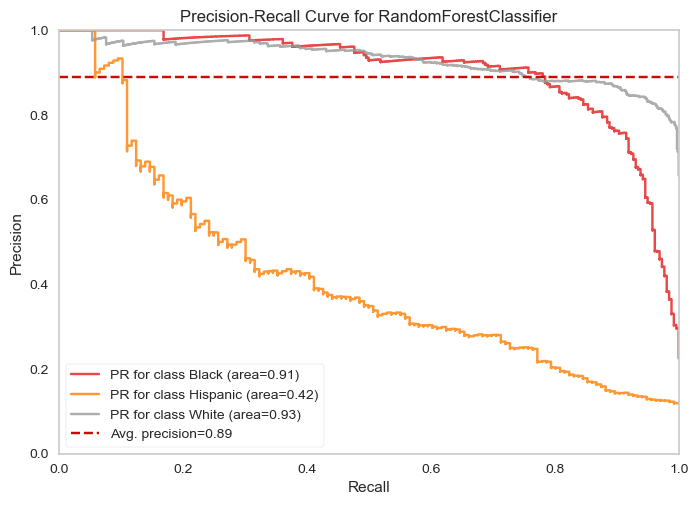

In [89]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [90]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [91]:
xgb_model = XGBClassifier(random_state=101)

Sklearn kutuphanesinde class_weight adinda bir fonksiyon var. Eger modelde unbalance datalari dengeli hale getirecek bir hyperparametre yok ise class_weigh fonksiyonu kullanilarak datadaki dengesiz veriler dengelenebilir. Asinda modelin icinde unbalance datalarda balance saglamak icin kullanilan scale_pos_weight parametresi var ama bu sadece 2 class oldugu zaman ise yarar. Burada 2' den fazla class var, bu yuzden kullanamiyorum :

In [92]:
from sklearn.utils import class_weight

compute_sample_weight ----> Gozlem agirliklarini sayilarina gore hesapla. Icine class_weight ve train datasini verdim :

In [93]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights    # Grid Search' de bu degiskeni kullanacagiz.

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

classes_weights degiskenini fit asamasinda yazdigimda, agirliklandirma islemini burada yapmis olurum :

In [128]:
#xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Bu islemden sonra bile skorlarin cok iyi olmadigini goruyoruz. Hispanic class'inin Train ve Test set skorlari arasinda cok fark var; yani overfitting bir durum var. Asagida bu skorlari GridSearch isleminde hyperparametreler ile oynayarak skorlari duzeltmeye calisacagim :

In [129]:
#eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Cross Validate sonucu aldigim skorlar yukaridaki tek seferlik skorlar ile benzer :

In [130]:
#model = XGBClassifier(random_state=101)

#scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
#df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores.mean()[2:]

### XGBoost Model GridsearchCV

Yukarida olusturdugum  degisken olan classes_weights' i DataFrame' e donusturerek bir degiskene atadim :

In [97]:
comp = pd.DataFrame(classes_weights)

<IPython.core.display.Javascript object>

In [98]:
# y_train2.reset_index(drop=True)

Icerisine label isminde bir sutun atadim. Bu sutunun icine deger olarak y_train2' yi indexlerini sifirlayarak verdim (Modelden gelen indexler gelmesin diye).

In [99]:
comp["label"]= y_train2.reset_index(drop=True)

label' a gore groupby yaptigimda her class icin agirlik katsayilarini verdi. Yani class' lardaki degerleri bu sayilarla carpacak. En fazla agirligi Hispanic class' ina vermis cunku en az sample sayisi ona ait. (1038 Black, 543 Hispanic, 3034 White sample var)

In [100]:
comp.groupby("label")[0].value_counts()

label     0       
White     0.507031    3034
Black     1.482017    1038
Hispanic  2.833026     543
Name: count, dtype: int64

label' a gore groupby yaptigimda her class icin agirlik katsayilarini verdi. Yani class' lardaki degerleri bu sayilarla carpacak. En fazla agirligi Hispanic class' ina vermis cunku en az sample sayisi ona ait. (1038 Black, 543 Hispanic, 3034 White sample var)

In [101]:
comp.groupby("label")[0].value_counts()

label     0       
White     0.507031    3034
Black     1.482017    1038
Hispanic  2.833026     543
Name: count, dtype: int64

In [102]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}      # colsample_bytree ---> max_feature ile ayni

GridSearch isleminde yine sadece Hispanic class' ina ait skorlari hesapliyorum :

In [131]:
#xgb_model = XGBClassifier(random_state=101)
#xgb_grid_model = GridSearchCV(xgb_model, 
#                              param_grid, 
#                              scoring=recall_Hispanic, 
#                              n_jobs = -1, 
#                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

In [ ]:
xgb_grid_model.best_params_     #colsample_bytree ve subsample haric diger parametreler default degerlerinde :

In [132]:
#xgb_grid_model.best_score_

Grid Search islemi sonrasi hala skorlarda cok fazla bir iyilesme yok ve Train ve Test set arasinda da cok fazla farki var. Hyperparametreler ile daha fazla oynamak gerekiyor. Test set skorlarinin Train set skorlarina daha fazla yaklasamadigini goruyoruz. Demek ki hyperparametreler ile oynadigimizda Train set skorlari Test set skorlarina yaklasmaya baslayacak :

In [133]:
#eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

XGBoost ve Random Forest' in bu datasetinde cok kotu skorlar verdigini soyleyebiliriz.

XGBoost modelin, Hispanic class' ina ait recall degerini tahmin etmedeki genel performansi %61 :

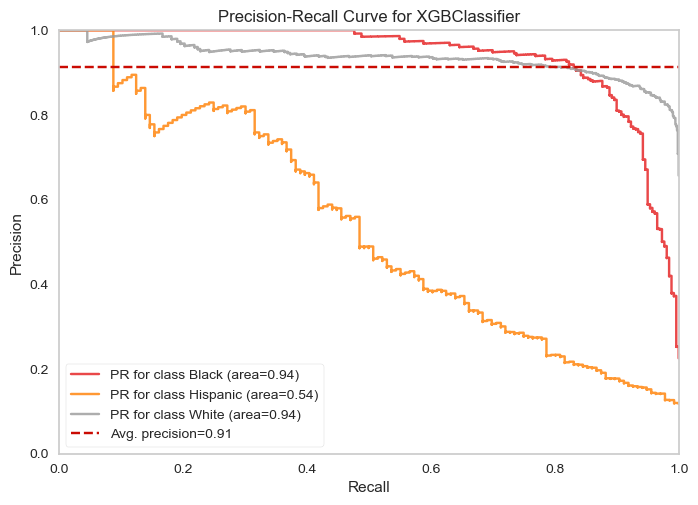

In [106]:
model = XGBClassifier(random_state=101, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

Hispanic class' ina ait skorlari her modelde asagidaki gibi degiskenlere atamistim. f1 ve recall skorlari burada array dondurur. Bu yuzden asagida modelleri kiyaslamak icin yazdigim fonksiyonda mutlaka log_f1[0] seklinde belirterek array icinden degerleri cekmek gerekir.

In [134]:
#y_pred = xgb_grid_model.predict(X_test2)

#xgb_AP = viz.score_["Hispanic"]
#xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
#xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

---
---

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [108]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.6268837976129379

Signature: matthews_corrcoef(y_true, y_pred, *, sample_weight=None)
Docstring:
Compute the Matthews correlation coefficient (MCC).

The Matthews correlation coefficient is used in machine learning as a
measure of the quality of binary and multiclass classifications. It takes
into account true and false positives and negatives and is generally
regarded as a balanced measure which can be used even if the classes are of
very different sizes. The MCC is in essence a correlation coefficient value
between -1 and +1. A coefficient of +1 represents a perfect prediction, 0
an average random prediction and -1 an inverse prediction.  The statistic
is also known as the phi coefficient. [source: Wikipedia]

Binary and multiclass labels are supported.  Only in the binary case does
this relate to information about true and false positives and negatives.
See references below.

Read more in the :ref:`User Guide <matthews_corrcoef>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    G

In [109]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.6167727721890135

Signature: cohen_kappa_score(y1, y2, *, labels=None, weights=None, sample_weight=None)
Docstring:
Compute Cohen's kappa: a statistic that measures inter-annotator agreement.

This function computes Cohen's kappa [1]_, a score that expresses the level
of agreement between two annotators on a classification problem. It is
defined as

.. math::
    \kappa = (p_o - p_e) / (1 - p_e)

where :math:`p_o` is the empirical probability of agreement on the label
assigned to any sample (the observed agreement ratio), and :math:`p_e` is
the expected agreement when both annotators assign labels randomly.
:math:`p_e` is estimated using a per-annotator empirical prior over the
class labels [2]_.

Read more in the :ref:`User Guide <cohen_kappa>`.

Parameters
----------
y1 : array-like of shape (n_samples,)
    Labels assigned by the first annotator.

y2 : array-like of shape (n_samples,)
    Labels assigned by the second annotator. The kappa statistic is
    symmetric, so swapping ``y1`` and ``y2`` does

In [135]:
#compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
#                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
#                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
#                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})    # Dengesiz datasetlerinde modelin genel performansi.

#def labels(ax):   # Sayilari yazdirmak icin.
#    for p in ax.patches:
#        width = p.get_width()                        # get bar length
#        ax.text(width,                               # set the text at 1 unit right of the bar
#                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
#                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
#                ha = 'left',                         # horizontal alignment
#                va = 'center')                       # vertical alignment
    
#plt.figure(figsize=(14,10))
#plt.subplot(311)
#compare = compare.sort_values(by="F1", ascending=False)
#ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")        # f1 score
#labels(ax)

#plt.subplot(312)
#compare = compare.sort_values(by="Recall", ascending=False)
#ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")   # recall score
#labels(ax)

#plt.subplot(313)
#compare = compare.sort_values(by="AP", ascending=False)
#ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")       # average precision score
#labels(ax)
#plt.show()

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

---
---

Final model icin pipeline' i yeniden tanimlayarak modeli egitiyorum :

In [113]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [114]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

Asagidaki tum feature' lardaki mean degerlerini alip bir insana aitmis gibi modele prediction yapmasi amaciyla verdim :

In [115]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.00000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000
mean,247.254290,1408.630265,328.071590,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.677760,139.529381,1022.059456,242.234356,872.112845,610.449991,498.331773,386.316519,1479.952158,283.232623,1024.206622,252.322586,1254.290172,827.105738,622.693708,351.880222,35.175420,62.606171,22.227249,240.553302,786.399203,98.915063,263.512394,339.458832,295.661640,553.098284,467.898769,1104.347201,85.098111,204.215635,189.574796,152.043682,570.424337,196.640839,333.274918,70.834113,348.930837,386.417923,1042.152366,632.534928,412.773964,433.017334,476.665280,541.376668,484.316693,69.76183,406.943144,119.601664,376.127578,414.554516,1390.525048,114.106604,417.227076,259.757670,1131.214422,354.805166,145.202288,898.592477,868.361068,578.013001,1766.951118,1716.938984,1405.392442,1101.631479,623.583637,176.696481,791.044548,459.389149,129.580343,884.659386,1632.470966,460.990293,318.409950,916.817126,230.459178,377.352054,1033.591090,800.981106,169.308372,831.334547,29.776391
std,37.457748,78.303123,20.444554,15.965783,71.260913,16.803556,13.379000,30.124094,41.270615,19.239580,42.011888,5.326965,17.050426,20.818789,7.248670,75.952953,26.4

In [116]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting     247.254290
acromialheight                    1408.630265
acromionradialelength              328.071590
anklecircumference                 225.201768
axillaheight                      1301.902583
balloffootcircumference            244.408043
balloffootlength                   195.118911
biacromialbreadth                  399.706015
bicepscircumferenceflexed          341.663027
bicristalbreadth                   274.903449
bideltoidbreadth                   491.454845
bimalleolarbreadth                  72.335413
bitragionchinarc                   324.962212
bitragionsubmandibulararc          306.677760
bizygomaticbreadth                 139.529381
buttockcircumference              1022.059456
buttockdepth                       242.234356
buttockheight                      872.112845
buttockkneelength                  610.449991
buttockpopliteallength             498.331773
calfcircumference                  386.316519
cervicaleheight                   

In [117]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

Yukarida 201. satirdaki gozlemi modelin tahmin etmesini istedim, Hispanic olarak tahmin etti. Asagida 201. satirdaki gozlemin gercek degerine baktim, o da Hispanic cikti. Yani model dogru tahmin yapti.

In [118]:
y[201]

'Hispanic'

Yukarida datanin mean degerlerini kullanarak olusturdugum DataFrame' i de tahmin icin verdi, model bunu White olarak tahmin etti Datada White class' i agirlikta oldugu icin bu class' i dondurmesi mantikli :

In [136]:
#final_model.predict([mean_human])

Yukaridaki modellerde aldigimiz skorlari daha fazla iyilestirebilmek icin farkli yontemler deneyecegim :

Evaluation metrics https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd
matthews_corrcoef ------> Aldimiz gercek degerler ile tahmin edilen degerler arasindaki correlation.

matthews_corrcoef ve cohen_kappa_score ------> eval_metric' de skoimizi algimizda, accuracy, makro, weighted ve class' larin kendilerine ozel skorlarinin hepsnin birbirinden farkli oldugunu gormustuk. Bunlarin hepsinin skorlarina binaen genel bir skor almamizi saglayan metriklerdir. Dengesiz veri setlerinde kullanilirlar.

In [120]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7827657214688859

matthews_corrcoef skoru %78, cohen_kappa_score ise %77 olarak genel bir model performans hesaplamis. Accuracy, recall, f1 score veya diger skorlar yerine bu skorlara bakabilirim. Aldigim bu skorlar yukarida modelin genel performansinda aldigim skor (log_AP) ile hemen hemen ayni. Dengesiz veri setlerinde bu skorlara da bakilabilir.

In [121]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7737579800746648

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [147]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [148]:
pip install --upgrade scikit-learn imblearn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [151]:
#!pip install scikit-learn==1.0.2
#!pip install imblearn==0.8.0


In [152]:
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE()
under = RandomUnderSampler()   # Default degerler ile baktik.

over_sampling -----> Tum class' lardaki gozlem sayilarini en buyuk class' taki gozlem sayisina esitle. (Default deger)

under_sampling -----> Tum class' lardaki gozlem sayilarini en kucuk class' taki gozlem sayisina esitle. Eger bunu yaparsam skorlar cok iyi cikacaktir ki bu istemedigim bir durum.

!!! Smote sadece Train set' e uygulanir test setinde gozlem sayisi artirilmaz. Eger test setinde de gozlem sayisini artirirsam skorlar cok iyi cikar ve bu yaniltir. !!!

Smote icindeki parametre olan k_neighbors=5 ile gozlemin etrafindaki 5 tane veriye bakar ve onlarin ortalama degerini alarak yeni bir veri olusturur. Gozlem sayisini aritma islemini bu sekilde yapar. Bu sekilde yapay veriler olusmus olur. 'under' yapmak istedigimde ise istenen kadar veriyi direk siler.

In [153]:
#!pip install imblearn

In [155]:
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline as imbpipeline   # Smote' un kendi kutuphanesindeki pipeline.

Hem over_sampling hem de under_sampling datada noise olusturur, ikisini de istemiyorum. Smote icinde bir parametre olan sampling_strategy' i kullanarak hangi class' in ne kadar artirilmasi veya azaltilmasini istedigimizi belirtiyorum. Biz burda 543 olan Hispanic sayisini 1200' e cikarmasini; White sayisini ise 2500' e dusurmesini istedim. Class' lardaki sayilari olabildigince dengeli bir sekilde birbirlerine yaklastirmaya calisiyorum. Cok buyuk degisimler saglikli sonuc vermeyecektir. Deneme yanilma yolu ile datanin dogal yapisini bozmayacak sekilde ne kadar ekleme yapip cikarmak gerektigine karar verebilirim. Cok hard bir sekilde veriyi artirma veya azaltma islemi hicbir zaman dogru sonuc vermez :

In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 1200})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [ ]:
y_resampled_over.value_counts()

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [ ]:
y_resampled_under.value_counts()

Black class' inin sayilari ile oynamadim cunku Hispanic ve white class' lari birbirleri ile karisiyorlar.

over ve under islemlerini yukarda tek tek yaptim. Bunun yerine asagida tek bir islem ile de yapabilirim. Asagida once Smote' un kendi pipeline' ini imblearn kutuphanesinden import ederek uyguluyorum. Burada sklearn kutuphanesinin pipeline' ini kullanamiyorum cunku ona sadece fit, transform ve predict islemleri uygulanabilir. Fakat burada  over_sampling ve under_sampling islemi yapmak ve bunu da fit_resample ile yapabilirim.

steps' de once ilgili class' larin sayilarini artir; sonra ilgili class' larin sayilarini azalt dedim. Bunu daha sonra pipeline icine tanimladim ve sonra fit_resample(X_train, y_train) yaparak islemi uyguladim. Class sayilari istedigim degere geldi.

In [ ]:
#  configuring pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# create new data over X_train and y_train.
# delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

In [ ]:
y_train.value_counts()

## Logistic Regression Over/ Under Sampling

over_sampling ve under _sampling islemini Logistic Regression' a uygulayacagim. Yapacagimiz islemlerin ayrintisini asagidaki not uzerinden inceleyebilirim :



In [ ]:
## what does the smote pipeline do?

smote_pipeline.fit(X_train, y_train) --> over.fit_resample(X_train) --> under.fit_resample(X_train_over) (Once over, sonra under yapar.)


                                     --> scaler.fit_transform(X_train_over_under), log_model.fit(X_train_over_under_scaled, y_train)  (Scale islemi yapar ve                                                                                                                                        sonra bunlari egitir.)


for predict, over and under sumpling algortims do nothing.

smote_pipeline.predict(X_test)       --> scaler.transform(X_test) --> log_model.predict(X_test_scaled) (Test datasina sacede scale islemi uygular ve predict                                                                                                          alir.)

Smote isleminde sklearn kutuphanesinin pipeline fonksiyonunu kullanamiyorum. Cunku orda fit_resample islemini uygulayamiyorum. Bu yuzden imblearn kutuphanesinin pipeline' ini kullandim
Asagida operations' da once over, sonra under, sonra scale, en son da modeli degiskenin icine tanimlamis oldum.

In [ ]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)    

Hispanic skorlarimizin hem Train hem de Test setinde dustugunu gordum. Yani bu datada skorlarimizi Smote islemi duzeltemedi.

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Cross Validation ile de Smote' tan aldigim tek seferlik skorlarin uyumlu oldugunu gordum. Class' lari ic ice gecmi datalarda Smote skorlari iyilestirir fakat buradaki gibi class' lari ic ice gecmis datalarda iyi bir sonuc vermez.

In [ ]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

Feature importance isleminin basarili olmasi icin ise datanin mutlaka scale edilmis olmasi gerekir. Bu yuzden hem X_train hem de X_set' e scale islemini uyguladim. Dummy uygukanmis feature' lar kullandigim icin de MinMaxScaler kullandim.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature importance yapabilmek icin Lasso uygulamam gerekir; bu yuzden penalty='l1' olarak seciyorum. Ridge secersek feature importance yapatim. l1; liblinear ya da saga ile kullanilir. 'saga' normalde buyuk datalarda kullanilir fakat recall skorlari daha iyi ciktigi icin saga' yi sectim.

Shap ile model uygulanirken, hangi class' la ilgili problem varsa o class' a ait skorlarin en iyi oldugu modeli secmeli. Bu yuzden biz Logistic' te Hispanic class' i icin en iyi sonucu elde ettigim parametreleri tanimladim. Feature selection yapacagim icin tahminlerin iyi oldugundan emin olmam gerekir. Mesela XGBoostve Random Forest modelleri burada kullanamazdim cunku skorlarinin cok kotu oldugunu biliyorum. Feature selection yapilabilecek modellerin secilmesi dogru olur.

In [ ]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

In [ ]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

"203. index' teki gozlemde hangi feature' larin daha fazla katkisi var?" diyerek sadece bir gozleme bakmak istedim.

Shap' i import ettikten sonra tahminlerimin iyi oldugu modeli (model_shap) ve X_train' i icine verdim. En son kodda ise X_test' in baslangic ve bitis indexlerini verdigimde bize su sonucu dondurur : Verilen gozlemi tahmin etmede hangi feature' in daha cok katkisi var?

In [ ]:
import shap
explainer = shap.Explainer(model_shap,X_train_scaled)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_scaled[start_index:end_index])

In [ ]:
shap_values sinif sayisi kadardir. 

In [ ]:
shap_values

In [ ]:
shap_values[0][0]     

# Ilk class' i (White) tahmin etmede hangi feature' larin ne kadar katkisi var?
# Cogu degerin Lasso' dan dolayi 0 oldugunu goruyorum. Dogru feature selection yapabilmek icin l1 kullanmak onemlidir. 
# Degerlerin her birisi bir feature' a denk gelir.

In [ ]:
shap_values[1][0]   

# Hispanic class' ini secmekte hangi feature' in ne kadar katkisi var?

In [ ]:
shap_values[2][0]   

# Black class' ini secmede hangi class' in ne kadar katkisi var?

In [ ]:
shap_values[0].shape

Asagidaki visualize isleminin aciklamasi :

model_shap.predict(X_test_scaled[start_index:end_index])[0] ----> 203. index' teki gozlem icin feature' larin onem sayisi.

shap_values[1] ----> Hispanic sinifini tahmin etmek icin hangi feature' in ne kadar katkisi var bunu gosterir.

In [ ]:
feature_names= X.columns ----> Feature isimlerini goster

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test_scaled[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],                       
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

Kirmizi renkler; hangi feature' in Hispanic class' ini tahmin etmede ne kadar katkisi oldugunu gosteriyor. Buyukluk ne kadar fazla ise katkisi o kadar fazla demek. Renklerin altinda feature isimlerini ve degerlerini de gorebiliyorum.

Mavi renkler ise tahmindeki negatif etkiyi gosteriyor. Yani en genis boyutta olan tahmin etmede en kotu feature. (Bu grafigi tek bir gozlem icin cizdirdim.)

In [ ]:
explainer.expected_value[1]

# Hispanic class' inin ilk base degeri. 
# Yani model, butun Hispanicler icin -0.81 olasiligi ile baslayacak. (Gradient Descent' te oldugu gibi)
# Bu deger, %50 olasiliktan dusuk bir deger anlamina geliyor.

In [ ]:
X_test_scaled[203]

In [ ]:
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns) 

In [ ]:
shap.force_plot(explainer.expected_value[2],
                shap_values[2],
                X_test_scaled[start_index:end_index], # for values
                feature_names= X.columns)

Yukarida 3 class icin de ayni gozleme ait grafiklere baktigimda, Hispanic : -1.01; White : -1.47; Black : -1.72 degerlerini almis. Buradan cikaracagim sonuc; bu gozlem icin en dusuk deger Hispanic class' ina ait. (Eksi degerler %50' den dusuk bir orana karsilik gelir. Hepsi %50' den dusuk cikmis ama en dusugu Hispanic)

Yukarida ornek olmasi acisindan, bir gozlem icin hangi feature' in ne kadar katki sagladigina baktim. Simdi asagida butun gozlemler icin hangi feature' in tahminlemeye ne kadar etkisi var bunu gorelim :

Shap values for all data

Shap icin feature importance' i olan modeller kullanilabilir. (Logistic Regression [l1 ile] veya Tree based modeller) 
Shap' in icine modeli ve scale edilmis olan X_train' i verdim. 
shap_values' un icine de X_test' i verdim ki hangi feature' in class' lari tahmin etmede ne kadar etkisi var bunu gozlemleyelim :

In [ ]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

Asagida kuvvetli ilk 13 feature arasinda Hispanic class' i tespit edilememis. Bu feature' larda White ve Black' ler cok iyi tespit edilmis. Hispanic' lerin tespiti 13. feature' dan sonra baslamis. Eger Shap yerine normal feature importance yapsaydim en guclu frature' lari secmis olsaydim Hispanic class' ina ait skorlar cok kotu cikacakti.

In [ ]:
shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

# Train test' i verdik ki data leakage olmasin.
# max_display=300 ----> "300 feature goster"

grafige gore, Hispanic' leri tespit etmede en cok katkisi olan feature' lar ile asagida bir liste olusturdum :

Data Cleaning asamasinda dogum yerleri ile ilgili olan feature' i (SubjectsBirthLocation) tutmusmuk. Grafigi incelersek dogum yerinin Hispanic' leri tespit etmede onemli bir yer tuttugunu gdumiz.

In [ ]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [ ]:
#list(X.columns)

Sectigim feature' lar ile yeniden X ve y yi olusturup modelimizi kurdum :

In [ ]:
X3 = data[hispanic]    
X3 = pd.get_dummies(data=X3, drop_first=True)
y = data.DODRace

hispanic degiskeninde 19 feature vardi fakat get_dummies isleminden sonra feature sayisinin 154' e ciktigini gordum. (Bu feature' larin cogu SubjectsBirthLocation' dan geldi)

In [ ]:
X3.shape 

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y)

Logistic Regression icin sectigimiz parametreleri tekrar vererek yeni belirledigim feature' lar ile modelimizi yeniden kurdum :

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

Shap' e verilen penalty="l1" olmak zorunda. l2 ile feature selection yapilmaz. 

In [ ]:
pipe_shap_model.fit(X_train3, y_train3)

Shap ile kurdugum bu modelde White ve Black skorlarinin da nispeten dustugunu goruyorum bununla beraber Hispanic recall skoru yukseldi. Eger klasik yontem ile feature selection yapsaydim en cok one cikan feature' lari alacaktim, Hispanic skorlarim cok kotulesecekti.

In [ ]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

In [ ]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

Shap' ten sonra PrecisionRecallCurve' de de Hispanic class' ina ait skor %70 cikmis :

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___